In [0]:
######################################
# FASHION MNIST IMAGE CLASSIFICATION # 
######################################

#The fashion mnist datasets is specifically about classifying fashion item images of about 60,000
#training examples and 10,000 examples for the test examples
# the idea of the fashion mnist datasets implementation is to apply any state-of-the-art deep learning framework 
#to help build a model to help us correctly classify 60,000 training image sets into classes (0-9) comprising of
#examples such as: T-Shirts/Top, Pullover, Trouser, Ankle boots etc and obtaining the best possible accuracy on test
#To aid our implementation of the fashion mnist problem. The 6th Sense+ group collectively agreed on implementing 
#the solution using tf.keras.




In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
slim = tf.contrib.slim

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_images)

60000

In [0]:
len(train_labels)

60000

In [0]:
test_images.shape

(10000, 28, 28)

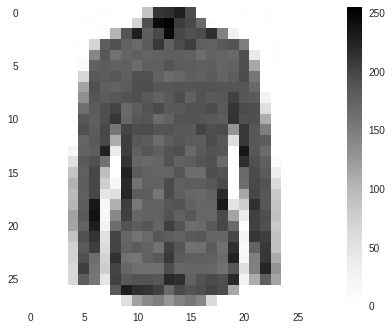

In [0]:
# data preprocessing 
plt.figure()
plt.imshow(train_images[12000])
plt.colorbar()
plt.grid(False)

In [0]:
#using greyscale implementation we have colors ranging between 0 and 255
train_images = train_images / 255.0

test_images = test_images / 255.0

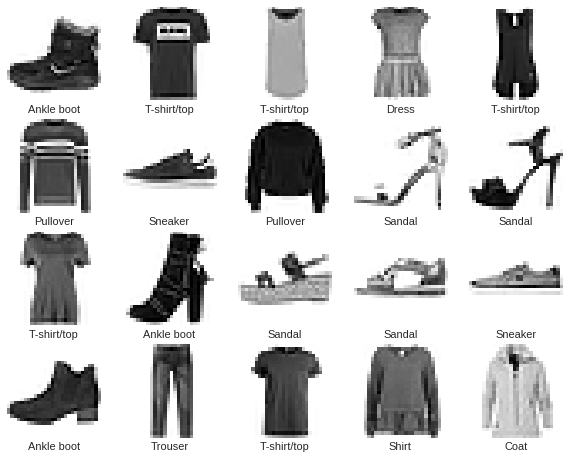

In [0]:
# Display first 20 training examples and their labels or classes
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[train_labels[i]])

In [0]:
# Now we need to build our model, Firstly, we try to set up our layers 
classifier = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
# The next step requires that we compile our model by specifying an optimizer and loss function obtained
classifier.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Lets now train our model
classifier.fit(train_images, train_labels, epochs=100)

Epoch 1/100
60000/60000 [==============================] - 7s 111us/step - loss: 0.4962 - acc: 0.8263
Epoch 2/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.3756 - acc: 0.8647
Epoch 3/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.3388 - acc: 0.8762
Epoch 4/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.3128 - acc: 0.8863
Epoch 5/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.2973 - acc: 0.8893
Epoch 6/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.2803 - acc: 0.8962
Epoch 7/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.2704 - acc: 0.9002
Epoch 8/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.2583 - acc: 0.9035
Epoch 9/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.2491 - acc: 0.9075
Epoch 10/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.2393 - 

In [0]:
# You would realize that the above step has gradually tailed off towards a sufficiently low loss function and quite a high accuracy of approx 91.1% on training


In [0]:
# Now lets simply compare how our model performs on the test dataset

test_loss, test_acc = classifier.evaluate(test_images, test_labels)
print('Test Accuracy:', test_acc)

10000/10000 [==============================] - 1s 71us/step
Test Accuracy: 0.8839


In [0]:
# The result of the accuracy above shows us that our model is performing correctly 0.88 (88.1%) of the time 
# Hence, lets try to make some predictions 
predictions = classifier.predict(test_images)

In [0]:
# lets now output predictions for the label 7 given the different classes representing each clothing/fashion item in our defined classes of (0 - 9) above
predictions[5]

array([1.2591846e-16, 1.0000000e+00, 3.2305913e-29, 1.6062350e-21,
       1.2203955e-26, 0.0000000e+00, 2.0334535e-23, 0.0000000e+00,
       8.4392210e-20, 0.0000000e+00], dtype=float32)

In [0]:
# You can clearly see that the resulting outputs of our prediction aligns with the number of classes defined in our labels earlier 

In [0]:
# So our model is quite confident that label[7] is a pullover
np.argmax(predictions[5])

1

In [0]:
# so lets quickly check
test_labels[5]

1

In [0]:
# Now lets simply visualize up to 10 examples to see results of our classifications in action
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(labels[predicted_label],
                                100*np.max(predictions_array),
                                labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

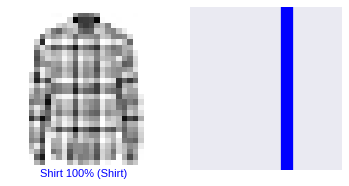

In [0]:
# lets quickly take a look at the 7th example 
i = 7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

In [0]:
# lets see another example
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
 plot_value_array(i, predictions,  test_labels)

IndentationError: ignored

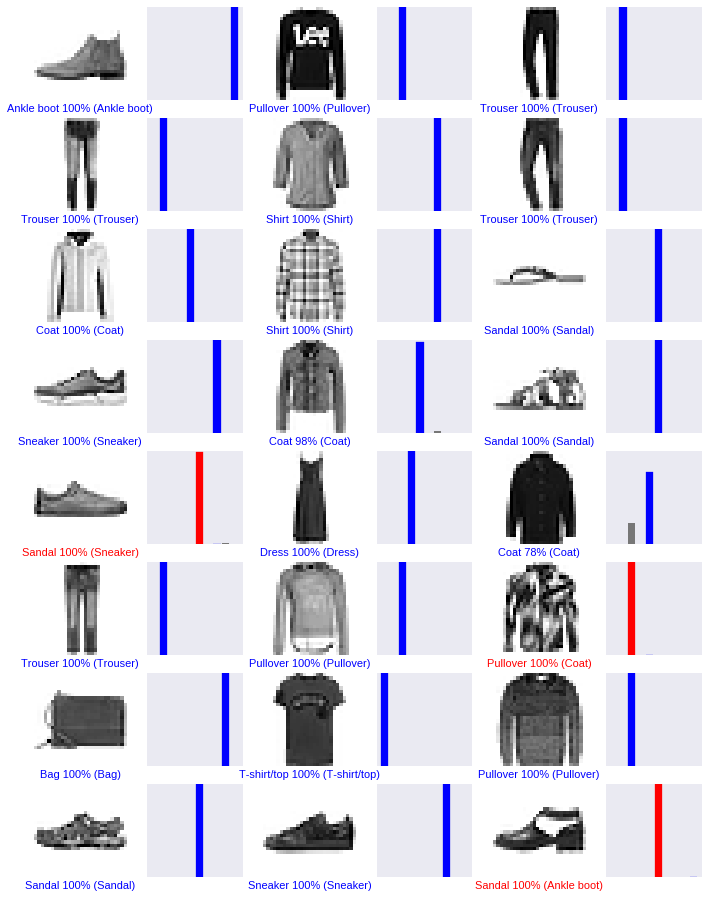

In [0]:
# Now lets try to Plot the first X test images, their predicted label, and the true label
# Correct predictions are in blue color while incorrect predictions are in red color
# see Outputs to confirm if this is true or not 
num_rows = 8
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [0]:
# Lets now quickly take an image from the test dataset to confirm image shape
img = test_images[0]

print(img.shape)

(28, 28)


In [0]:
# So, usually tf.keras frameworks are optimized to output predictions on a batch or collections 
# That means since we are using a single image we should still include it in a list
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [0]:
# the resultant shape comes out as a flattened nd array if you notice

In [0]:
# Lets now try to predict for the single image above
predictions_single = classifier.predict(img)

print(predictions_single)

[[3.8173557e-27 0.0000000e+00 2.8380289e-28 4.0419693e-36 0.0000000e+00
  1.3864063e-10 7.3074796e-37 1.1317592e-06 6.8285285e-26 9.9999893e-01]]


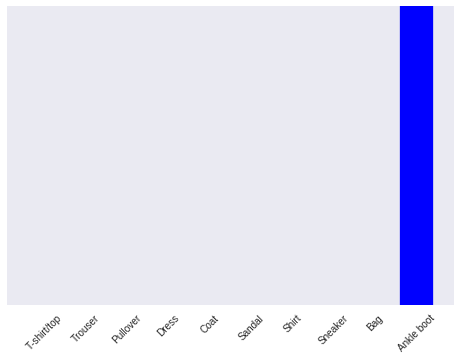

In [0]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), labels, rotation=45)